<a href="https://colab.research.google.com/github/Nanashi-bot/kaggle/blob/main/kaggles4e12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/train.csv')

In [2]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [3]:
# Imputing Annual Income, Age, Number of Dependents, Insurance Duration, Health Score, Previous Claims, Vehicle Age, Credit Score with mean and
# Marrital Status, Occupation, Customer Feedback, Exercise Frequency, Property Type, Policy Type, Smoking Status with mode

numerical_columns = ['Age', 'Annual Income', 'Number of Dependents', 'Insurance Duration', 'Health Score',
                     'Previous Claims', 'Vehicle Age', 'Credit Score']

# Impute with mean
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].mean())

categorical_columns = ['Marital Status', 'Occupation', 'Customer Feedback', 'Exercise Frequency', 'Property Type', 'Policy Type', 'Smoking Status']

# Impute with mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# To remove na values, not done because we lose too many values
# print(len(df))
print(df.isna().sum())
df = df.dropna()
# print(len(df))

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         1
Occupation              0
Health Score            0
Location                1
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       1
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          1
dtype: int64


In [4]:
y = df['Premium Amount']
X = df.drop('Premium Amount', axis = 1)

In [5]:
X.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.000000,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Self-Employed,15.569731,Rural,Comprehensive,1.0,12.0,694.000000,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,592.820878,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Self-Employed,10.938144,Rural,Basic,1.0,0.0,367.000000,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.000000,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House


In [6]:
X = X.drop(columns=['id', 'Policy Start Date'], axis = 1)

In [7]:
# Checking how many possible values for each categorical column:

print(X['Gender'].unique())
print(X['Marital Status'].unique())
print(X['Education Level'].unique())
print(X['Occupation'].unique())
print(X['Location'].unique())
print(X['Policy Type'].unique())
print(X['Customer Feedback'].unique())
print(X['Smoking Status'].unique())
print(X['Exercise Frequency'].unique())
print(X['Property Type'].unique())

['Female' 'Male']
['Married' 'Divorced' 'Single']
["Bachelor's" "Master's" 'High School' 'PhD']
['Self-Employed' 'Employed' 'Unemployed']
['Urban' 'Rural' 'Suburban']
['Premium' 'Comprehensive' 'Basic']
['Poor' 'Average' 'Good']
['No' 'Yes']
['Weekly' 'Monthly' 'Daily' 'Rarely']
['House' 'Apartment' 'Condo']


In [8]:
# Doing label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X['Gender'] = label_encoder.fit_transform(X['Gender'])
X['Education Level'] = label_encoder.fit_transform(X['Education Level'])
X['Policy Type'] = label_encoder.fit_transform(X['Policy Type'])
X['Customer Feedback'] = label_encoder.fit_transform(X['Customer Feedback'])
X['Smoking Status'] = label_encoder.fit_transform(X['Smoking Status'])
X['Exercise Frequency'] = label_encoder.fit_transform(X['Exercise Frequency'])

In [9]:
# Doing one hot encoding
X= pd.get_dummies(X, columns=['Marital Status', 'Occupation', 'Location', 'Property Type'])

In [10]:
X.head()

,Age,Gender,Annual Income,Number of Dependents,Education Level,Health Score,Policy Type,Previous Claims,Vehicle Age,Credit Score,...,Marital Status_Single,Occupation_Employed,Occupation_Self-Employed,Occupation_Unemployed,Location_Rural,Location_Suburban,Location_Urban,Property Type_Apartment,Property Type_Condo,Property Type_House
0,19.0,0,10049.0,1.0,0,22.598761,2,2.0,17.0,372.000000,...,False,False,True,False,False,False,True,False,False,True
1,39.0,0,31678.0,3.0,2,15.569731,1,1.0,12.0,694.000000,...,False,False,True,False,True,False,False,False,False,True
2,23.0,1,25602.0,3.0,1,47.177549,2,1.0,14.0,592.820878,...,False,False,True,False,False,True,False,False,False,True
3,21.0,1,141855.0,2.0,0,10.938144,0,1.0,0.0,367.000000,...,False,False,True,False,True,False,False,True,False,False
4,21.0,1,39651.0,1.0,0,20.376094,2,0.0,8.0,598.000000,...,True,False,True,False,True,False,False,False,False,True


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decide which one to use
scaler = StandardScaler()  # For standardization (zero mean, unit variance)
# scaler = MinMaxScaler()  # For normalization (scale to [0, 1])

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr =  LinearRegression()

lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression:")
print(f"MSE = {mse:.2f}, R^2 = {r2}")

Linear Regression:
MSE = 748649.91, R^2 = 0.0019004985075348202


In [12]:
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

params = {
    'objective': 'reg:squarederror',  # For regression
    'eval_metric': 'rmse',  # Root Mean Squared Error
    'max_depth': 6,  # Depth of trees
    'learning_rate': 0.1,
    'colsample_bytree': 0.8,  # Fraction of features to use for each tree
    'subsample': 0.8,  # Fraction of samples used for training
}

model = xgb.train(params, dtrain, num_boost_round=100)

y_pred = model.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 723695.543213965


In [13]:
# Need to use this for xgboost randomized search to work
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.3.1
Uninstalling scikit-learn-1.3.1:
  Successfully uninstalled scikit-learn-1.3.1
  Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [14]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
}

xgb_reg = XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(xgb_reg, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
Best Score: 0.035079484797205095


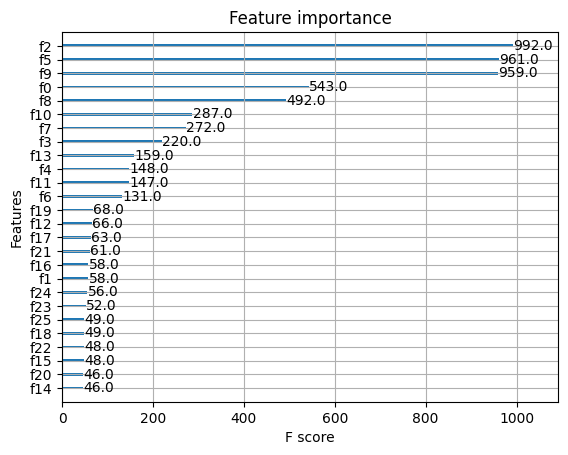

In [15]:
# Plot feature importance
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.show()

In [35]:
# Running model on test set:

test = pd.read_csv('/content/test.csv')

In [36]:
test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [47]:
len(test)

800000

In [38]:
numerical_columns = ['Age', 'Annual Income', 'Number of Dependents', 'Insurance Duration', 'Health Score',
                     'Previous Claims', 'Vehicle Age', 'Credit Score']

# Impute with mean
for col in numerical_columns:
    test[col] = test[col].fillna(test[col].mean())

categorical_columns = ['Marital Status', 'Occupation', 'Customer Feedback', 'Exercise Frequency', 'Property Type', 'Policy Type', 'Smoking Status']

# Impute with mode
for col in categorical_columns:
    test[col] = test[col].fillna(test[col].mode()[0])

In [40]:
test = test.drop(columns=['id', 'Policy Start Date'], axis = 1)

In [42]:
# Doing label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

test['Gender'] = label_encoder.fit_transform(test['Gender'])
test['Education Level'] = label_encoder.fit_transform(test['Education Level'])
test['Policy Type'] = label_encoder.fit_transform(test['Policy Type'])
test['Customer Feedback'] = label_encoder.fit_transform(test['Customer Feedback'])
test['Smoking Status'] = label_encoder.fit_transform(test['Smoking Status'])
test['Exercise Frequency'] = label_encoder.fit_transform(test['Exercise Frequency'])

In [44]:
# Doing one hot encoding
test = pd.get_dummies(test, columns=['Marital Status', 'Occupation', 'Location', 'Property Type'])

In [46]:
test = scaler.fit_transform(test)

In [50]:
import xgboost as xgb

best_params = grid_search.best_params_

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': best_params['max_depth'],
    'learning_rate': best_params['learning_rate'],
    'colsample_bytree': 0.8,  # fraction of features for each tree
    'subsample': 0.8,         # fraction of samples for training
}

dtest = xgb.DMatrix(test)

num_boost_round = best_params['n_estimators']
model = xgb.train(params, dtrain, num_boost_round=num_boost_round)

y_pred = model.predict(dtest)

In [52]:
ids = range(1200000, 2000000)

result = pd.DataFrame({'id': ids, 'Premium Amount': y_pred})

print(result.head())

        id  Premium Amount
0  1200000     1368.495850
1  1200001     1120.756226
2  1200002     1066.880737
3  1200003     1093.804077
4  1200004     1048.667725


In [55]:
result.to_csv('result.csv', index=False)